In [1]:
import sys
import os
sys.path.insert(0, 'GPED')
from GPED import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb


# Fractional Quantum Hall on the Haldane Sphere
## Parameters:
### Number of electrons $Ne = 8$
### 1/filling fraction $m = 3$
### shift $s = 3$
### number of flux $N_{\phi} = mN_e-s$

In [3]:
# parameters

# number of electron 
Ne = 8 
# 1/filling fraction
m = 3 
# sperical shift
shift = 3 
# number of flux
Nphi = m*Ne-shift 
# monopole strength
Q = Nphi/2.0 
# number of orbits
N = Nphi + 1 
# fix total angular momentum in z-direction
Lz = 0 
# good quantum number
qn = [Ne, Lz]

In [4]:
# use the predefined basis infomation and operator information
BInfo, OpInfo = FQHSphere(Q)

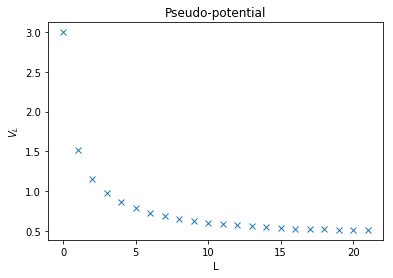

In [5]:
# Decompose the Coulomb interaction into Haldane Pseudo-potential
def Vcoulomb(L, R = 1):
    v = 2.0/R
    v = v*comb((4*Q-2*L), (2*Q-L),exact=False)
    v = v*comb((4*Q+2*L+2), (2*Q+L+1),exact=False)
    v = v/(comb((4*Q+2),(2*Q+1),exact=False))**2
    return v

Vpp = []
for L in range(int(2*Q+1)):
    Vpp.insert(0, Vcoulomb(L))

plt.plot(Vpp,'x')
plt.xlabel('L')
plt.ylabel(r'$V_L$')
plt.title('Pseudo-potential')

# convert the pseudo-potential to the Coulomb matrix element
CGTable = cg_table(Q)
Vmat = FQHSphereMatEle(Nphi, Vpp, CGTable)

In [6]:
# second quantized Hamiltonina
h = OperatorMat(OpInfo)
for l1 in range(Nphi+1):
    for l2 in range(l1+1):
        for l3 in range(Nphi+1):
            for l4 in range(l3+1):
                if(l1 + l2 == l3 + l4):
                    m1 = l1 - Q
                    m2 = l2 - Q
                    m3 = l3 - Q
                    m4 = l4 - Q
                    
                    V1234 = Vmat[m1, m2, m3, m4]
                    V1243 = Vmat[m1, m2, m4, m3]
                    V2134 = Vmat[m2, m1, m3, m4]
                    V2143 = Vmat[m2, m1, m4, m3]
                    val = V1234 - V1243 - V2134 + V2143
                    
                    h = h + [val, 'Cdag', l1, 'Cdag', l2, 'C', l3, 'C', l4]                
                    

In [7]:
# Create the basis in the number conserving sector
BSet = BasisSet(BInfo, qn)

# get the sparse Hamiltonian
H = getMat(h, BSet)

# diagonalization 
E, psis = lowestEigs(H, 100)

Text(0.5,1,'Orbital cut Entanglement Spectrum')

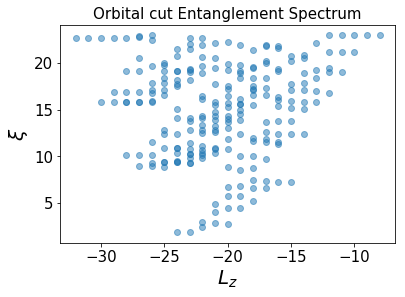

In [8]:
# calculate the ground state entanglement spectrum in the N/2 sector
psi = psis[0]
SvN, ES = EntanglementSpectrum(psi, BSet, BInfo, int(N/2))

plot_ES(int(Ne/2), ES)
plt.xlabel(r'$L_z$')
plt.ylabel(r'$\xi$')
plt.title('Orbital cut Entanglement Spectrum')

Text(0.5,1,'Energy Spectrum')

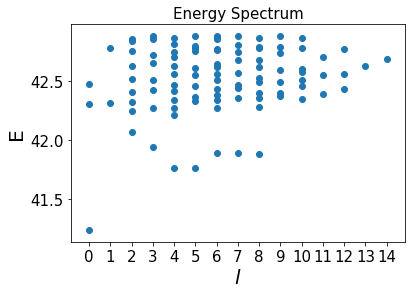

In [9]:
# measure the L^2 eigenvalue of each eigenstate
L2_list = Ltotal(Q, OpInfo, BSet, psis, Lz)
plt.xticks(range(19))
plt.scatter(L2_list,E)
plt.xlabel(r'$l$')
plt.ylabel(r'E')
plt.title('Energy Spectrum')